For this project, I want to figure out the following queations of the titanic dataset. :)
1) Who were the passengers on the Titanic?
2) What deck were the passengers on and how it relates to their class?
3) Where are they from?
4) Who were alone and who were with family?
5) What factors made ppl survive?

In [83]:
import pandas as pd
from pandas import Series, DataFrame

In [84]:
titanic_df = pd.read_csv('train.csv')

In [85]:
titanic_df.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [86]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   survived            627 non-null    int64  
 1   sex                 627 non-null    object 
 2   age                 627 non-null    float64
 3   n_siblings_spouses  627 non-null    int64  
 4   parch               627 non-null    int64  
 5   fare                627 non-null    float64
 6   class               627 non-null    object 
 7   deck                627 non-null    object 
 8   embark_town         627 non-null    object 
 9   alone               627 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 49.1+ KB


In [87]:
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

For question 1, we firstly classify a data into male or female or child. As the children may affect a lots in their survivial rate

In [88]:
def male_female_child(passenger):
    sex, age = passenger
    if age < 16:
        return 'child'
    else:
        return sex

In [89]:
titanic_df['person'] = titanic_df[['sex','age']].apply(male_female_child,axis=1) # as we are passing columns, axis = 1

In [90]:
titanic_df.head(10)

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone,person
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n,male
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n,female
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y,female
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n,female
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y,male
5,0,male,2.0,3,1,21.0750,Third,unknown,Southampton,n,child
6,1,female,27.0,0,2,11.1333,Third,unknown,Southampton,n,female
7,1,female,14.0,1,0,30.0708,Second,unknown,Cherbourg,n,child
8,1,female,4.0,1,1,16.7000,Third,G,Southampton,n,child
9,0,male,20.0,0,0,8.0500,Third,unknown,Southampton,y,male


To show the relationship between the class and person

In [91]:
titanic_df = titanic_df.replace('First', 1) # to change 'First', 'Second', 'Third' into 1 2 3 to plot the catgraph follow 1,2,3 order
titanic_df = titanic_df.replace('Second', 2)
titanic_df = titanic_df.replace('Third', 3)
titanic_df.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone,person
0,0,male,22.0,1,0,7.2500,3,unknown,Southampton,n,male
1,1,female,38.0,1,0,71.2833,1,C,Cherbourg,n,female
2,1,female,26.0,0,0,7.9250,3,unknown,Southampton,y,female
3,1,female,35.0,1,0,53.1000,1,C,Southampton,n,female
4,0,male,28.0,0,0,8.4583,3,unknown,Queenstown,y,male


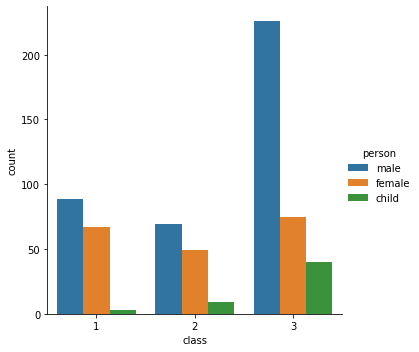

In [92]:
sns.catplot(data=titanic_df,x='class',kind='count',hue='person')

<AxesSubplot:>

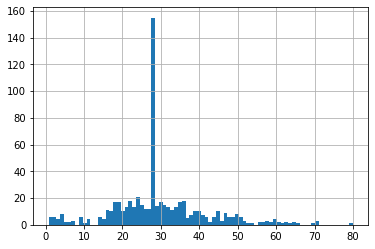

In [99]:
titanic_df['age'].hist(bins=80)

In [94]:
titanic_df['age'].mean()

29.631307814992027

In [101]:
titanic_df['person'].value_counts()

male      384
female    191
child      52
Name: person, dtype: int64